In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
plt.style.use('seaborn-white')

### Load the interactions summary from Human Promoter Analysis

In [2]:
#df = pd.read_csv('Human_Promoter_Analysis_v6_final/Interactions_Results/interactions_summary.txt',sep='\t')
#df = pd.read_csv('Human_Promoter_Analysis_v6_considerTopHit/Interactions_Results/interactions_summary.txt',sep='\t')

#df = pd.read_csv('IR_Experiment_final_euclidean_v8/Interactions_Results/interactions_summary_attnLimit-0.12.txt',sep='\t')
#df = pd.read_csv('IR_Experiment_final_euclidean_v8_CNN-MH/Interactions_Results/interactions_summary_attnLimit-0.12.txt',sep='\t')
#df = pd.read_csv('IR_Experiment_final_euclidean_v8_CNN-MH/Interactions_Results_v9_run2/interactions_summary_attnLimit-0.12.txt',sep='\t')

#df = pd.read_csv('Human_Promoter_Analysis_v6_testingNew_forv7/Interactions_Results_tomtompval0.01/interactions_summary_withMaxAttnCheck.txt',sep='\t')

FileNotFoundError: [Errno 2] File b'IR_Experiment_final_euclidean_v8_CNN-MH/Interactions_Results_v9_run2/interactions_summary_attnLimit-0.12.txt' does not exist: b'IR_Experiment_final_euclidean_v8_CNN-MH/Interactions_Results_v9_run2/interactions_summary_attnLimit-0.12.txt'

In [ ]:
df.shape

In [ ]:
df.head()

##### keep significant interactions

In [ ]:
df = df[df['adjusted_pval']<0.05]

In [ ]:
#df = df[(df['motif1_qval'] < 0.01) & (df['motif2_qval']<0.01)]

In [3]:
df.shape

NameError: name 'df' is not defined

##### Sort by observed interactions

In [4]:
df = df.sort_values(by='num_obs',ascending=False)

NameError: name 'df' is not defined

In [5]:
df.head(10)

NameError: name 'df' is not defined

In [181]:
#df = df.head(250)

In [185]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)

In [186]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

In [187]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
791,filter35<-->filter55,6389,M4459_1.02,0.000013,M4459_1.02,0.000014,102.0,66.0,388.0,460.0,3.404345e-23,9.818328e-21,EGR1,EGR1,EGR1$\longleftrightarrow$EGR1
514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
790,filter35<-->filter54,6388,M4459_1.02,0.000013,M4459_1.02,0.000795,54.0,414.0,375.0,388.0,1.663315e-19,1.958578e-17,EGR1,EGR1,EGR1$\longleftrightarrow$EGR1


In [188]:
df = df[df['TF1']!=df['TF2']]

In [189]:
df.shape

(1741, 15)

In [190]:
df[(df['TF_interaction']=='EGR1'+r'$\longleftrightarrow$'+'MAZ') | (df['TF_interaction']=='MAZ'+r'$\longleftrightarrow$'+'EGR1')]

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
815,filter35<-->filter123,6457,M4459_1.02,0.000013,M6336_1.02,0.006135,246.0,78.0,290.0,285.0,1.842239e-11,3.168588e-10,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1464,filter55<-->filter123,9527,M4459_1.02,0.000014,M6336_1.02,0.006135,42.0,66.0,289.0,274.0,1.558532e-13,4.401412e-12,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1410,filter54<-->filter123,9383,M4459_1.02,0.000795,M6336_1.02,0.006135,240.0,72.0,283.0,227.0,3.633902e-10,4.624616e-09,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1670,filter64<-->filter123,10778,M4459_1.02,0.007129,M6336_1.02,0.006135,144.0,60.0,280.0,405.0,1.467377e-08,1.260285e-07,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1620,filter63<-->filter123,10643,M4459_1.02,0.010835,M6336_1.02,0.006135,24.0,6.0,266.0,212.0,1.004060e-04,3.401565e-04,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
480,filter25<-->filter123,4772,M4459_1.02,0.000058,M6336_1.02,0.006135,216.0,78.0,265.0,260.0,1.999021e-10,2.708000e-09,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
617,filter31<-->filter123,5795,M4459_1.02,0.000013,M6336_1.02,0.006135,54.0,78.0,264.0,218.0,1.392997e-07,9.415976e-07,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1517,filter57<-->filter123,9812,M4459_1.02,0.000131,M6336_1.02,0.006135,354.0,168.0,262.0,288.0,1.914643e-10,2.604333e-09,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1242,filter50<-->filter123,8797,M4459_1.02,0.016883,M6336_1.02,0.006135,240.0,90.0,250.0,273.0,5.549042e-05,2.003373e-04,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
2334,filter112<-->filter123,16082,M4459_1.02,0.009004,M6336_1.02,0.006135,132.0,84.0,233.0,231.0,1.092107e-07,7.559281e-07,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ


#### fix A<->B vs B<->A

In [191]:
df = df.reset_index()

In [192]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,ZNF263$\longleftrightarrow$EGR1


In [193]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1'][i]
    TF2 = df['TF2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [194]:
df.head(20)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263
5,797,filter35<-->filter67,6401,M4459_1.02,0.000013,M6482_1.02,0.000249,210.0,78.0,370.0,439.0,1.833560e-13,5.039758e-12,EGR1,SP7,EGR1$\longleftrightarrow$SP7
6,1466,filter55<-->filter132,9536,M4459_1.02,0.000014,M0609_1.02,0.002972,96.0,384.0,369.0,354.0,2.972475e-15,1.300049e-13,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1
7,817,filter35<-->filter132,6466,M4459_1.02,0.000013,M0609_1.02,0.002972,252.0,60.0,369.0,377.0,8.237352e-26,3.998130e-23,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1
8,1446,filter55<-->filter67,9471,M4459_1.02,0.000014,M6482_1.02,0.000249,84.0,288.0,365.0,438.0,5.223083e-11,8.197110e-10,EGR1,SP7,EGR1$\longleftrightarrow$SP7
9,820,filter35<-->filter137,6471,M4459_1.02,0.000013,M2314_1.02,0.043771,234.0,432.0,363.0,398.0,1.314790e-26,8.051020e-24,EGR1,SP2,EGR1$\longleftrightarrow$SP2


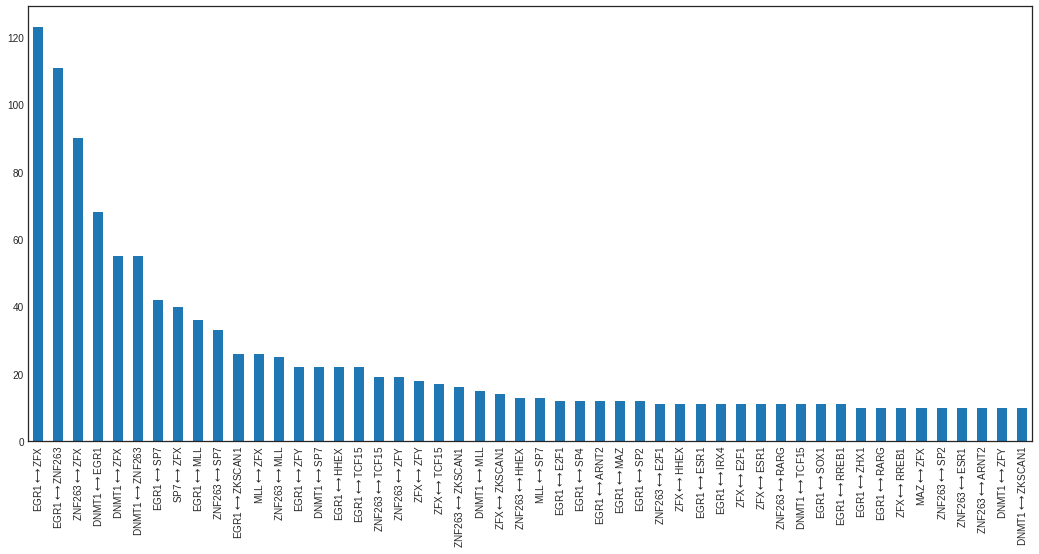

In [195]:
df['TF_interaction'].value_counts()[:50].plot(kind='bar', figsize=(18,8))

In [196]:
df.shape

(1741, 16)

In [197]:
df['TF_interaction'].value_counts()

EGR1$\longleftrightarrow$ZFX        123
EGR1$\longleftrightarrow$ZNF263     111
ZNF263$\longleftrightarrow$ZFX       90
DNMT1$\longleftrightarrow$EGR1       68
DNMT1$\longleftrightarrow$ZFX        55
                                   ... 
RREB1$\longleftrightarrow$ZFY         1
ARNT2$\longleftrightarrow$E2F1        1
FOXN3$\longleftrightarrow$ZNF263      1
ZHX1$\longleftrightarrow$ESR1         1
ARNT2$\longleftrightarrow$MAZ         1
Name: TF_interaction, Length: 241, dtype: int64

##### Just picking a single annotated TF for a given motif

In [198]:
#df['annotated_interaction_single'] = df['interaction'].apply(get_annotation,annotation_data = df_annotate, single_TF = True)

In [199]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263
5,797,filter35<-->filter67,6401,M4459_1.02,0.000013,M6482_1.02,0.000249,210.0,78.0,370.0,439.0,1.833560e-13,5.039758e-12,EGR1,SP7,EGR1$\longleftrightarrow$SP7
6,1466,filter55<-->filter132,9536,M4459_1.02,0.000014,M0609_1.02,0.002972,96.0,384.0,369.0,354.0,2.972475e-15,1.300049e-13,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1
7,817,filter35<-->filter132,6466,M4459_1.02,0.000013,M0609_1.02,0.002972,252.0,60.0,369.0,377.0,8.237352e-26,3.998130e-23,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1
8,1446,filter55<-->filter67,9471,M4459_1.02,0.000014,M6482_1.02,0.000249,84.0,288.0,365.0,438.0,5.223083e-11,8.197110e-10,EGR1,SP7,EGR1$\longleftrightarrow$SP7
9,820,filter35<-->filter137,6471,M4459_1.02,0.000013,M2314_1.02,0.043771,234.0,432.0,363.0,398.0,1.314790e-26,8.051020e-24,EGR1,SP2,EGR1$\longleftrightarrow$SP2


### Plot observed values of interaction for N interactions

In [200]:
#N = 50
#df.head(N).plot(x='annotated_interaction_single', y='observed_pos', kind='bar', figsize=(18,8))

### Scatter plot of mean distance of interaction vs observed interactions

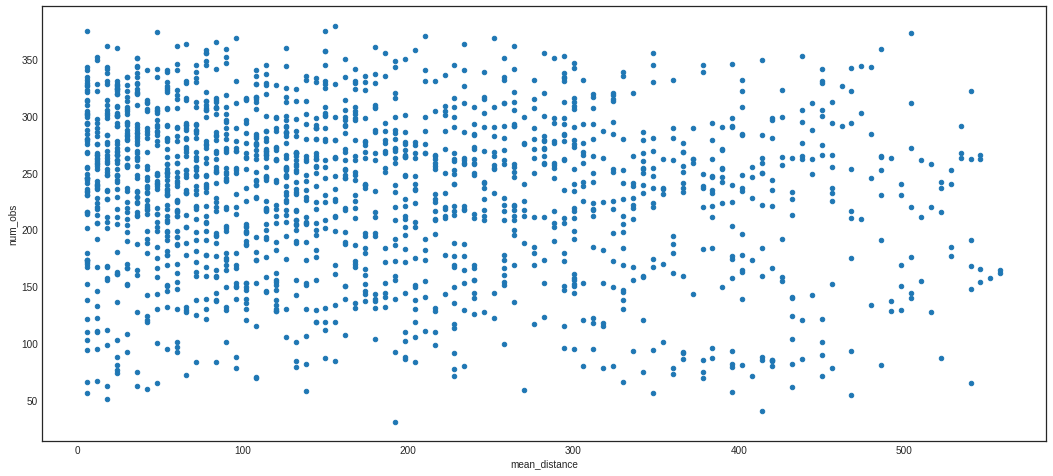

In [201]:
#N = 100
df.plot(x='mean_distance', y='num_obs', kind='scatter', figsize=(18,8))

### Distribution of mean distance of interaction

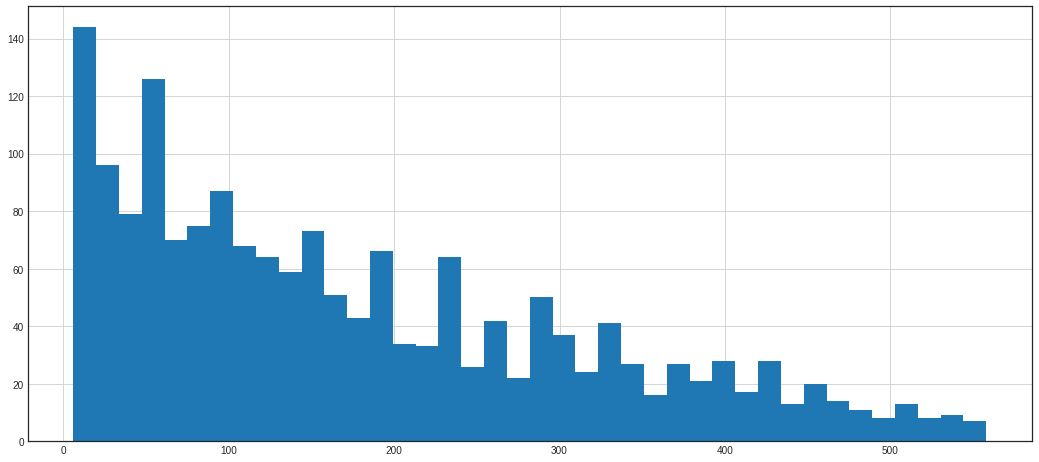

In [202]:
df['mean_distance'].hist(bins=40, figsize=(18,8))

In [203]:
np.mean(df['mean_distance']),np.median(df['mean_distance'])

(177.48765077541643, 144.0)

### Most frequent TFs involved in interactions

In [204]:
#df['TF_A'] = df['annotated_interaction_single'].apply(lambda x: x.split('<-->')[0])
#df['TF_B'] = df['annotated_interaction_single'].apply(lambda x: x.split('<-->')[1])

In [205]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263


In [206]:
all_TFs = df['TF1'].value_counts().to_dict()
all_TFs_b = df['TF2'].value_counts().to_dict()

all_TFs.update(all_TFs_b)
all_TFs = pd.Series(all_TFs).sort_values(ascending=False)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f21908ca5c0>,)

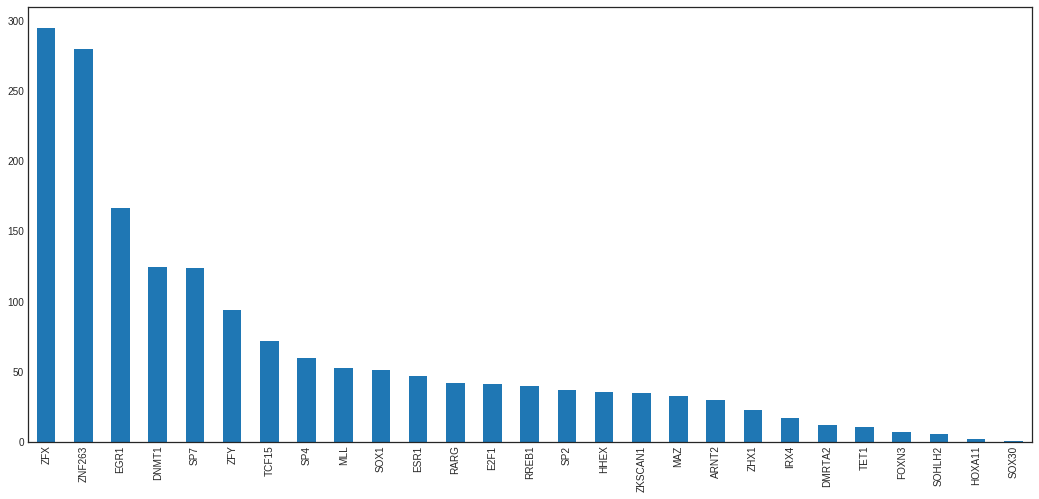

In [207]:
all_TFs.plot(kind='bar',figsize=(18,8)),

### Most Frequent TF Family Interactions

In [208]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]

In [209]:
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [210]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263,CxxC,C2H2 ZF
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF
5,797,filter35<-->filter67,6401,M4459_1.02,0.000013,M6482_1.02,0.000249,210.0,78.0,370.0,439.0,1.833560e-13,5.039758e-12,EGR1,SP7,EGR1$\longleftrightarrow$SP7,C2H2 ZF,C2H2 ZF
6,1466,filter55<-->filter132,9536,M4459_1.02,0.000014,M0609_1.02,0.002972,96.0,384.0,369.0,354.0,2.972475e-15,1.300049e-13,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC
7,817,filter35<-->filter132,6466,M4459_1.02,0.000013,M0609_1.02,0.002972,252.0,60.0,369.0,377.0,8.237352e-26,3.998130e-23,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC
8,1446,filter55<-->filter67,9471,M4459_1.02,0.000014,M6482_1.02,0.000249,84.0,288.0,365.0,438.0,5.223083e-11,8.197110e-10,EGR1,SP7,EGR1$\longleftrightarrow$SP7,C2H2 ZF,C2H2 ZF
9,820,filter35<-->filter137,6471,M4459_1.02,0.000013,M2314_1.02,0.043771,234.0,432.0,363.0,398.0,1.314790e-26,8.051020e-24,EGR1,SP2,EGR1$\longleftrightarrow$SP2,C2H2 ZF,C2H2 ZF


In [211]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [212]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF


In [213]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1_Family'][i]
    TF2 = df['TF2_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [214]:
df.head(5)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF


In [215]:
df.to_csv('ATTN_IR_all_significant_TFs.csv')

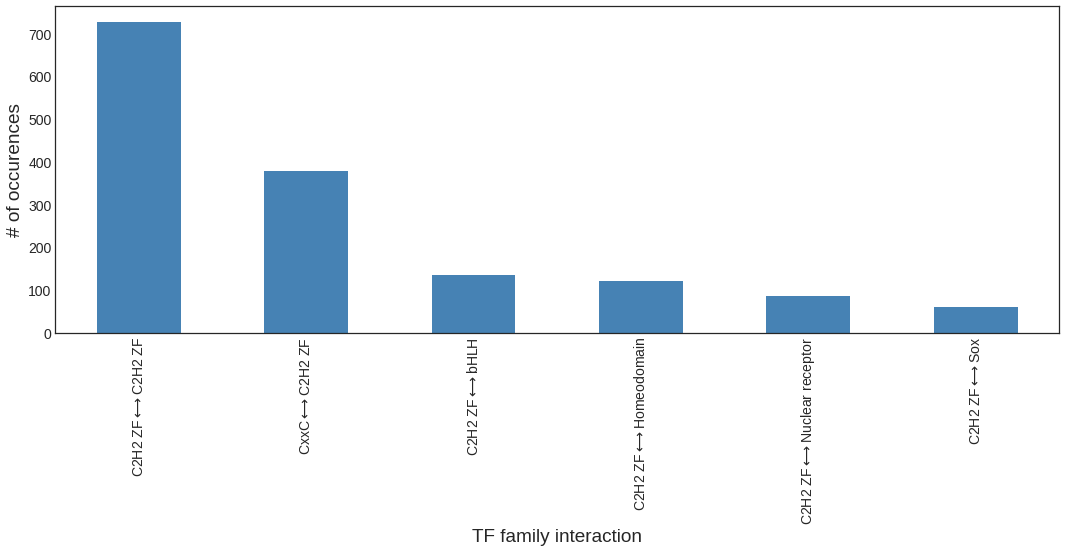

In [216]:
ax = df['Family_Interaction'].value_counts()[:6].plot(kind='bar',color='steelblue',figsize=(18,6),fontsize=14)
ax.set_xlabel("TF family interaction",fontsize=19)
ax.set_ylabel("# of occurences",fontsize=19)
ax.xaxis.set_tick_params(rotation=90)
#ax.set_title('Top interacting families of transcription factors',fontsize=18)
plt.savefig('Family_interactions_IR.pdf',bbox_inches='tight')

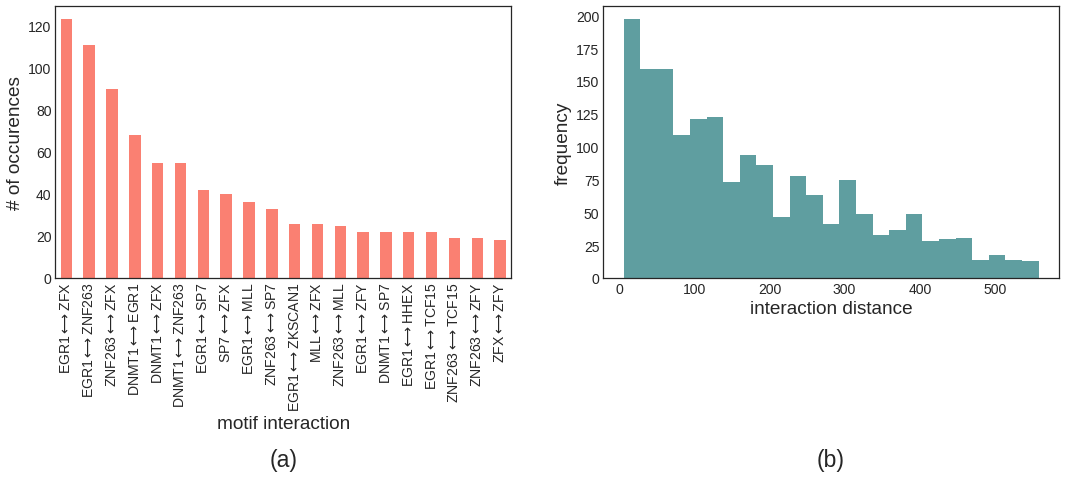

In [217]:
fig, axes = plt.subplots(1, 2)
ax1 = df['TF_interaction'].value_counts()[:20].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=14,ax=axes[0])
ax1.set_xlabel("motif interaction",fontsize=19)
ax1.set_ylabel("# of occurences",fontsize=19)
ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Most frequent interactions',fontsize=16)

#ax1 = df['Family_Interaction'].value_counts()[:6].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=14,ax=axes[0])
#ax1.set_xlabel("TF family interaction",fontsize=19)
#ax1.set_ylabel("# of occurences",fontsize=19)
#ax1.xaxis.set_tick_params(rotation=90)



ax2 = df['mean_distance'].plot(kind='hist',bins=25, figsize=(18,5),color='cadetblue',fontsize=14,ax=axes[1])
ax2.set_xlabel("interaction distance",fontsize=19)
ax2.set_ylabel("frequency",fontsize=19)
ax2.xaxis.set_tick_params(rotation=0)
#ax2.set_title('Distribution of motif interaction distances',fontsize=16)

ax1.text(0.5,-0.69, "(a)", size=23, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.69, "(b)", size=23, ha="center", 
         transform=ax2.transAxes)
#df_list[count].plot(ax=axes[1,1])
plt.savefig('Main_IR.pdf',bbox_inches='tight')

In [218]:
df['motifsOnlyInt'] = df['motif1']+':'+df['motif2']
df['familyOnlyInt'] = df['TF1_Family']+':'+df['TF2_Family']
df.to_csv('ATTN_IR_Final.txt',sep='\t')
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,...,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF,M0609_1.02:M4459_1.02,CxxC:C2H2 ZF
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,...,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M4459_1.02:M4604_1.02,C2H2 ZF:C2H2 ZF
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,...,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF,M0609_1.02:M4459_1.02,CxxC:C2H2 ZF
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,...,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF,M0609_1.02:M4604_1.02,CxxC:C2H2 ZF
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,...,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M4604_1.02:M4459_1.02,C2H2 ZF:C2H2 ZF


In [243]:
ATTN_unique = df.loc[df['TF_interaction'].drop_duplicates().index][['filter_interaction','TF_interaction','Family_Interaction','adjusted_pval']]
ATTN_unique.to_csv('ATTN_unique_IR_interactions.csv',index=False)

### Annotate Interactions using TRUSTv2 (and other sources)

In [219]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

    
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/mouse_co-regulate_dict.pckl','rb') as f:
    mouse_dict = pickle.load(f)  

#### NOTE
The following doesn't test for a group of TFs belonging to the same subfamily (for instance, SP*) and checking for their known co-occurence with another TF. For example, SP1 shares almost 90% of its binding site motif with other SP members (SP4 specifically) and TRRUSTv2 reports its interaction with WT1. It means we can label SP4<-->WT1 interaction to be known (reported in TRRUSTv2). However, we aren't checking for those cases. This means the number of interactions that we can annotate is potentially a lot higher than what is reported next.

In [220]:
def annotate_interaction(x, intr_dict = None):
    TFs_A,TFs_B = x.split(r'$\longleftrightarrow$')
    TFs_A = TFs_A.split(',')
    TFs_B = TFs_B.split(',')
    
    for TF_A in TFs_A:
        if TF_A not in intr_dict:
            continue
        for TF_B in TFs_B:
            if TF_B not in intr_dict:
                continue
            TF_A_targets = intr_dict[TF_A][:,0]
            TF_B_targets = intr_dict[TF_B][:,0]
            if len(set.intersection(set(TF_A_targets),set(TF_B_targets))) != 0:
                return 1 #interaction found (the two TFs have shared targets)
            
    
    return 0

In [221]:
df['Interaction_in_TRUSTv2'] = df['TF_interaction'].apply(annotate_interaction, intr_dict = human_dict)

In [222]:
df['Interaction_in_TRUSTv2'].value_counts()

0    1592
1     149
Name: Interaction_in_TRUSTv2, dtype: int64

In [223]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1][df.columns[[0,1,3,4,5,6,7,8,12,13,14,15,16,17,18]]]

In [224]:
df.shape

(1741, 22)

In [225]:
df_resTRUSTv2.shape

(149, 15)

In [226]:
df_resTRUSTv2

,index,filter_interaction,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,514,filter27<-->filter35,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
2,525,filter27<-->filter55,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
6,1466,filter55<-->filter132,M4459_1.02,0.000014,M0609_1.02,0.002972,96.0,384.0,1.300049e-13,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC,CxxC$\longleftrightarrow$C2H2 ZF
7,817,filter35<-->filter132,M4459_1.02,0.000013,M0609_1.02,0.002972,252.0,60.0,3.998130e-23,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC,CxxC$\longleftrightarrow$C2H2 ZF
11,524,filter27<-->filter54,M0609_1.02,0.012142,M4459_1.02,0.000795,18.0,30.0,1.488867e-22,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,154,filter8<-->filter25,M0609_1.02,0.036016,M4459_1.02,0.000058,42.0,12.0,1.448969e-05,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
1365,256,filter13<-->filter89,M4459_1.02,0.004985,M0609_1.02,0.006953,126.0,198.0,7.002489e-03,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC,CxxC$\longleftrightarrow$C2H2 ZF
1377,166,filter8<-->filter50,M0609_1.02,0.036016,M4459_1.02,0.016883,210.0,270.0,7.053120e-04,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
1440,151,filter8<-->filter13,M0609_1.02,0.036016,M4459_1.02,0.004985,36.0,222.0,5.852112e-07,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF


In [227]:
df_resTRUSTv2[['TF_interaction','TF1_Family','TF2_Family','adjusted_pval']].groupby('TF_interaction').max()

,TF1_Family,TF2_Family,adjusted_pval
TF_interaction,,,
DNMT1$\longleftrightarrow$E2F1,E2F,E2F,4.151392e-04
DNMT1$\longleftrightarrow$EGR1,CxxC,CxxC,4.943389e-02
DNMT1$\longleftrightarrow$ESR1,Nuclear receptor,Nuclear receptor,5.551734e-03
DNMT1$\longleftrightarrow$SP4,CxxC,CxxC,6.187457e-04
E2F1$\longleftrightarrow$ESR1,E2F,Nuclear receptor,8.245818e-07
E2F1$\longleftrightarrow$SP4,E2F,C2H2 ZF,1.473596e-10
EGR1$\longleftrightarrow$E2F1,E2F,E2F,6.544085e-04
EGR1$\longleftrightarrow$ESR1,C2H2 ZF,Nuclear receptor,5.488973e-05
EGR1$\longleftrightarrow$MAZ,C2H2 ZF,C2H2 ZF,2.647254e-03


## Motif Families Enriched Analysis

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [234]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [235]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [236]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['TF_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [237]:
tf_family_dict = {}
for TF in df_annotate['Motif_ID']:
    tf_family_dict[TF] = df_annotate[df_annotate['Motif_ID']==TF]['Family_Name'].iloc[0]

In [300]:
#df_pos = pd.read_csv('Basset_noEmbd/Motif_Analysis/tomtom/tomtom.tsv',sep='\t')
df_pos = pd.read_csv('tomtom_IR.tsv', sep='\t') #this is from SATORI's CNN-MH model
#df_pos = pd.read_csv('CNN-MH_noEmbd/Motif_Analysis/tomtom/tomtom.tsv',sep='\t')

#df_pos = pd.read_csv('CNN-RNN-MH_noEmbd/Motif_Analysis/tomtom/tomtom.tsv',sep='\t')

df_pos['TF'] = df_pos['Target_ID'].apply(get_annotation, annotation_data = df_annotate, single_TF=False)

In [301]:
#df_neg = pd.read_csv('Basset_noEmbd/Motif_Analysis_Negative/tomtom/tomtom.tsv',sep='\t')
df_neg = pd.read_csv('tomtom_nonIR.tsv', sep='\t') #this is from SATORI's CNN-MH model
#df_neg = pd.read_csv('CNN-MH_noEmbd/Motif_Analysis_Negative/tomtom/tomtom.tsv',sep='\t')

#df_neg = pd.read_csv('CNN-RNN-MH_noEmbd/Motif_Analysis_Negative/tomtom/tomtom.tsv',sep='\t')

df_neg['TF'] = df_neg['Target_ID'].apply(get_annotation, annotation_data = df_annotate,single_TF=False)

In [302]:
#df_pos = df_pos.loc[df_pos.groupby('Query_ID')['q-value'].idxmin()]
#df_neg = df_neg.loc[df_neg.groupby('Query_ID')['q-value'].idxmin()]

In [303]:
thresh = 0.01
df_pos = df_pos[df_pos['q-value']<thresh]
df_neg = df_neg[df_neg['q-value']<thresh]

In [304]:
df_pos.shape, df_neg.shape

((60, 11), (69, 11))

In [293]:
df_pos['Family'] = df_pos['Target_ID'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [294]:
df_neg['Family'] = df_neg['Target_ID'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [295]:
df_pos_res = df_pos['Family'].value_counts()/df_pos.shape[0]

In [296]:
df_neg_res = df_neg['Family'].value_counts()/df_neg.shape[0]

In [297]:
df_pos.head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
12,filter5,M6552_1.02,4.0,0.000006,0.004668,0.009079,11.0,GCCCCCTGCCCCC,CCCCTCCCCCACCCC,-,"ZNF281,ZNF148",C2H2 ZF
13,filter5,M0404_1.02,1.0,0.000016,0.011652,0.009079,9.0,GCCCCCTGCCCCC,TGCCCCCCTT,-,ZNF202,C2H2 ZF
14,filter5,M6482_1.02,10.0,0.000019,0.013775,0.009079,10.0,GCCCCCTGCCCCC,CCCCGGCCCCGCCCCCCCCC,-,"SP7,SP3,SP6,SP5,SP9",C2H2 ZF
22,filter8,M1934_1.02,7.0,0.000002,0.001364,0.002632,13.0,ACTGACCCCCGCC,AGGTCAGGGTGACCTGGGCC,+,ESR1,Nuclear receptor
23,filter9,M4459_1.02,7.0,0.000002,0.001243,0.002481,13.0,GCAGGAGGGGGGG,GTGCGGGGGCGGGGGGGGGG,+,EGR1,C2H2 ZF


In [298]:
df_pos['Family'].unique()

array(['C2H2 ZF', 'Nuclear receptor', 'Homeodomain', 'Forkhead', 'Sox',
       'CxxC', 'E2F', 'DM', 'Unknown'], dtype=object)

In [299]:
df_neg['Family'].unique()

array(['Sox', 'C2H2 ZF', 'DM', 'CxxC', 'UNKNOWN', 'Homeodomain',
       'Forkhead', 'RFX'], dtype=object)

In [290]:
df_pos[df_pos['TF']=='MAZ']

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
118,filter95,M6336_1.02,4.0,0.000016,0.011593,0.007631,13.0,CCCTCCCCCCCCC,CCCTCCCTCCCCCCCCC,-,MAZ,C2H2 ZF
129,filter99,M6336_1.02,2.0,0.000021,0.015680,0.011015,13.0,CCCCCTCCCCCCC,CCCTCCCTCCCCCCCCC,-,MAZ,C2H2 ZF
210,filter162,M6336_1.02,4.0,0.000129,0.094205,0.026375,13.0,CCCTGCCCCCCCC,CCCTCCCTCCCCCCCCC,-,MAZ,C2H2 ZF


In [251]:
df_pos['Family'].value_counts(normalize=True)

C2H2 ZF             0.616667
CxxC                0.133333
Homeodomain         0.116667
Sox                 0.033333
Nuclear receptor    0.033333
E2F                 0.016667
Unknown             0.016667
DM                  0.016667
Forkhead            0.016667
Name: Family, dtype: float64

In [252]:
df_pos[df_pos['Query_ID']=='filter146']

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family


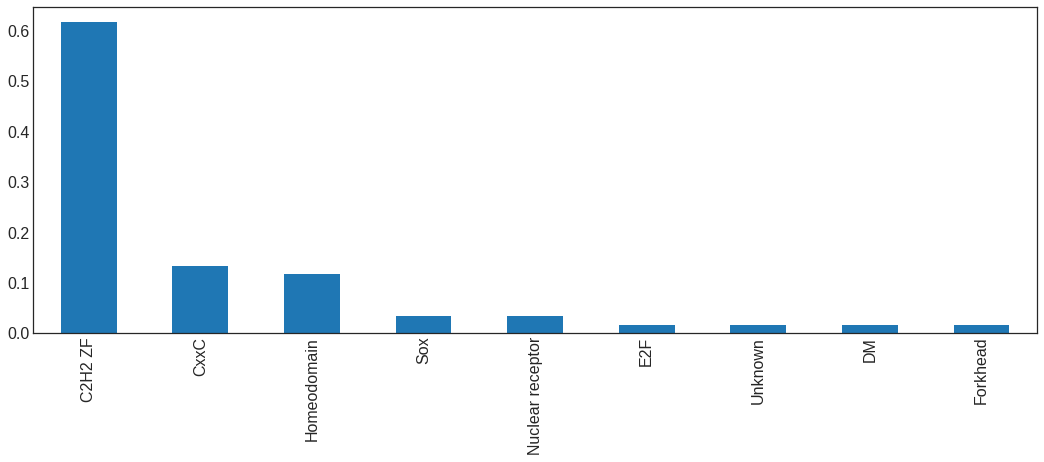

In [253]:
df_pos_res.plot(kind='bar',figsize=(18,6), fontsize=16)

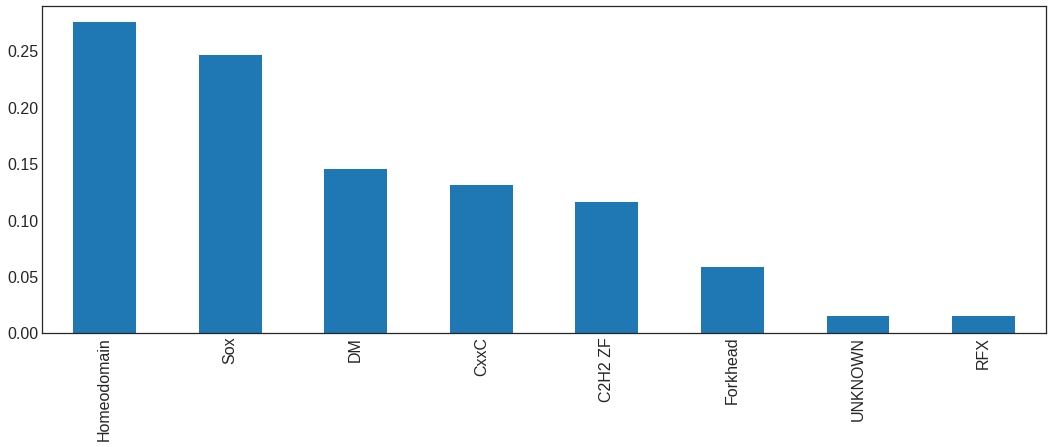

In [254]:
 df_neg_res.plot(kind='bar',figsize=(18,6), fontsize=16)

In [255]:
df_neg

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter0,M1605_1.02,-1.0,3.758660e-06,0.002755,0.005399,10.0,TATTCTCTTATAT,ATTCATCTTT,+,SOX1,Sox
1,filter0,M1589_1.02,-1.0,9.559980e-06,0.007007,0.006866,10.0,TATTCTCTTATAT,ATTGTTCTGC,-,SOX30,Sox
6,filter2,M1605_1.02,-4.0,5.225040e-06,0.003830,0.007374,9.0,AAATATTTTTTTT,ATTCATCTTT,+,SOX1,Sox
12,filter5,M0404_1.02,0.0,6.775300e-06,0.004966,0.009822,10.0,TCCCCCTTTTTTT,TGCCCCCCTT,-,ZNF202,C2H2 ZF
14,filter10,M0436_1.02,-2.0,2.707780e-07,0.000198,0.000393,10.0,TCTTTTTTTTTTT,TTGTTTATTG,+,ZNF35,C2H2 ZF
...,...,...,...,...,...,...,...,...,...,...,...,...
433,filter199,M0630_1.02,-2.0,2.142770e-05,0.015706,0.004394,10.0,ACATTGTTTTATT,AATGTATCAA,+,DMRT1,DM
434,filter199,M1605_1.02,-2.0,2.484690e-05,0.018213,0.004458,10.0,ACATTGTTTTATT,ATTCATCTTT,+,SOX1,Sox
435,filter199,M1601_1.02,-2.0,3.769700e-05,0.027632,0.006012,9.0,ACATTGTTTTATT,ATTGTTCTC,+,SOX11,Sox
436,filter199,M0408_1.02,-3.0,5.093000e-05,0.037332,0.006646,10.0,ACATTGTTTTATT,ATGTGCACAT,+,ZKSCAN1,C2H2 ZF


In [256]:
df_pos_res

C2H2 ZF             0.616667
CxxC                0.133333
Homeodomain         0.116667
Sox                 0.033333
Nuclear receptor    0.033333
E2F                 0.016667
Unknown             0.016667
DM                  0.016667
Forkhead            0.016667
Name: Family, dtype: float64

In [257]:
df_neg_res

Homeodomain    0.275362
Sox            0.246377
DM             0.144928
CxxC           0.130435
C2H2 ZF        0.115942
Forkhead       0.057971
UNKNOWN        0.014493
RFX            0.014493
Name: Family, dtype: float64

In [258]:
df_pos.shape,df_neg.shape

((60, 12), (69, 12))

In [259]:
df_pos.head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
12,filter5,M6552_1.02,4.0,0.000006,0.004668,0.009079,11.0,GCCCCCTGCCCCC,CCCCTCCCCCACCCC,-,"ZNF281,ZNF148",C2H2 ZF
13,filter5,M0404_1.02,1.0,0.000016,0.011652,0.009079,9.0,GCCCCCTGCCCCC,TGCCCCCCTT,-,ZNF202,C2H2 ZF
14,filter5,M6482_1.02,10.0,0.000019,0.013775,0.009079,10.0,GCCCCCTGCCCCC,CCCCGGCCCCGCCCCCCCCC,-,"SP7,SP3,SP6,SP5,SP9",C2H2 ZF
22,filter8,M1934_1.02,7.0,0.000002,0.001364,0.002632,13.0,ACTGACCCCCGCC,AGGTCAGGGTGACCTGGGCC,+,ESR1,Nuclear receptor
23,filter9,M4459_1.02,7.0,0.000002,0.001243,0.002481,13.0,GCAGGAGGGGGGG,GTGCGGGGGCGGGGGGGGGG,+,EGR1,C2H2 ZF


In [260]:
pos_size = len(set(df_pos['Target_ID']))
neg_size = len(set(df_neg['Target_ID']))
inters_size = len(set.intersection(set(df_pos['Target_ID']),set(df_neg['Target_ID'])))

In [261]:
pos_size,neg_size,inters_size

(28, 23, 10)

##### Venn diagrams

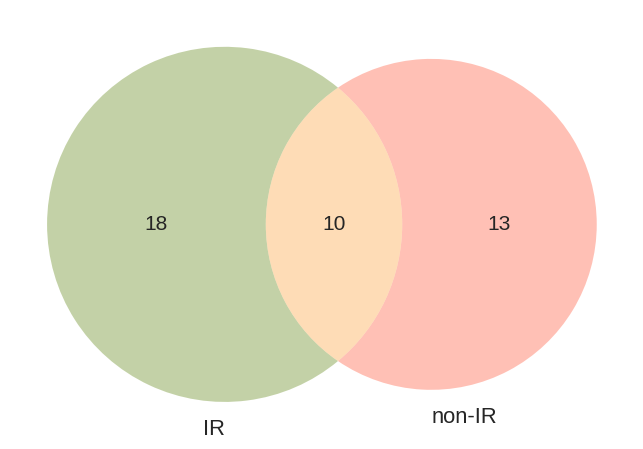

In [262]:
plt.figure(figsize=(14,8))
v = venn2(subsets=((pos_size),(neg_size),inters_size), set_labels=('IR','non-IR'),set_colors=('olivedrab','tomato'))
v.get_label_by_id('100').set_text(pos_size-inters_size)
v.get_label_by_id('010').set_text(neg_size-inters_size)

for text in v.set_labels:
    text.set_fontsize(22)

for text in v.subset_labels:
    text.set_fontsize(21)

#plt.text(-0.5,0.54,"IR vs. non-IR TF motif overlap",fontsize=25)
#plt.savefig('IR_motif-overlap_venn.pdf',bbox_inches='tight')

In [263]:
df_pos.shape

(60, 12)

In [264]:
df_pos = df_pos.drop_duplicates(subset='Target_ID',keep='first')

In [265]:
df_pos['Family'].value_counts(normalize=True)

C2H2 ZF             0.428571
Homeodomain         0.142857
CxxC                0.142857
Sox                 0.071429
Nuclear receptor    0.071429
E2F                 0.035714
Unknown             0.035714
DM                  0.035714
Forkhead            0.035714
Name: Family, dtype: float64

In [266]:
df_pos.shape

(28, 12)

In [267]:
df_pos

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
12,filter5,M6552_1.02,4.0,6.369030e-06,0.004668,0.009079,11.0,GCCCCCTGCCCCC,CCCCTCCCCCACCCC,-,"ZNF281,ZNF148",C2H2 ZF
13,filter5,M0404_1.02,1.0,1.589630e-05,0.011652,0.009079,9.0,GCCCCCTGCCCCC,TGCCCCCCTT,-,ZNF202,C2H2 ZF
14,filter5,M6482_1.02,10.0,1.879310e-05,0.013775,0.009079,10.0,GCCCCCTGCCCCC,CCCCGGCCCCGCCCCCCCCC,-,"SP7,SP3,SP6,SP5,SP9",C2H2 ZF
22,filter8,M1934_1.02,7.0,1.860310e-06,0.001364,0.002632,13.0,ACTGACCCCCGCC,AGGTCAGGGTGACCTGGGCC,+,ESR1,Nuclear receptor
23,filter9,M4459_1.02,7.0,1.695120e-06,0.001243,0.002481,13.0,GCAGGAGGGGGGG,GTGCGGGGGCGGGGGGGGGG,+,EGR1,C2H2 ZF
26,filter15,M4604_1.02,8.0,5.374410e-06,0.003939,0.003916,13.0,AGCAGGGGGGGGG,GGGGAGGAGGGAGGGGAGGAG,+,ZNF263,C2H2 ZF
28,filter18,M6547_1.02,2.0,2.721430e-06,0.001995,0.003956,13.0,CTGGGCCCGGGGC,GCCGAGGCCTGGGGCCCCC,-,"ZFX,ZFY",C2H2 ZF
32,filter22,M1110_1.02,-2.0,7.849180e-07,0.000575,0.001123,10.0,TCTCAACGCCGGG,TCTATTGCCC,-,HHEX,Homeodomain
33,filter22,M0898_1.02,-3.0,1.719930e-05,0.012607,0.009363,8.0,TCTCAACGCCGGG,TTACGTAA,+,ZHX1,Homeodomain
34,filter22,M0756_1.02,-1.0,1.963820e-05,0.014395,0.009363,9.0,TCTCAACGCCGGG,GTAAACAAA,+,"FOXN3,FOXK2,FOXD4,FOXE1,FOXS1,FOXD4L1,FOXI2,FO...",Forkhead


In [268]:
temp_res = df_pos['Family'].value_counts()
res = {}
res[temp_res.keys()[0]] = temp_res.values[0]
res[temp_res.keys()[1]] = temp_res.values[1]
res['Others'] = temp_res[2:].sum()
res.values()

dict_values([12, 4, 12])

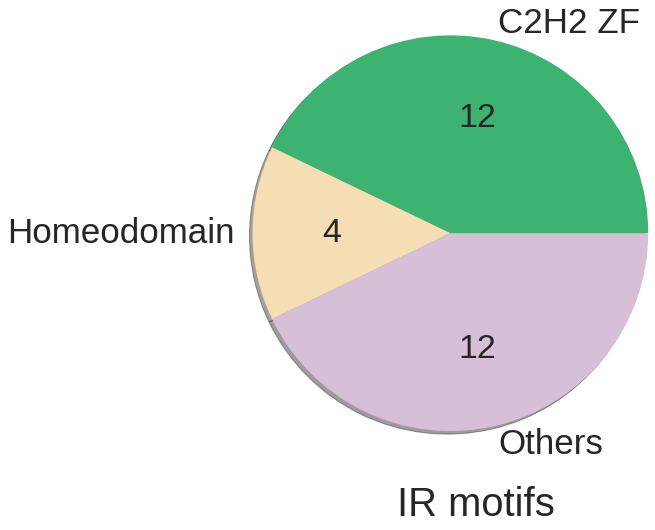

In [269]:
#res = df_pos['Family'].value_counts()[:4]
plt.figure(figsize=(7,7))
v = plt.pie(res.values(),explode=None,labels=res.keys(),shadow=True,labeldistance=1.09,radius=1.3,
            colors=['mediumseagreen','wheat','thistle','darksalmon'],
            autopct=lambda p: '{:.0f}'.format((p/100)*np.asarray(list(res.values())).sum())) #lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*res.sum())
for txt in v[1]:
    txt.set_fontsize(35)
for txt in v[2]:
    txt.set_fontsize(34)
plt.text(-0.35,-1.85,'IR motifs',fontsize=40)
plt.savefig('IR_motif-fam-pie_pos.pdf',bbox_inches='tight')

In [270]:
df_neg = df_neg.drop_duplicates(subset='Target_ID',keep='first')

In [271]:
df_neg.shape

(23, 12)

In [272]:
df_neg['Family'].value_counts(normalize=True)

Homeodomain    0.260870
Sox            0.217391
C2H2 ZF        0.130435
Forkhead       0.130435
CxxC           0.086957
DM             0.086957
UNKNOWN        0.043478
RFX            0.043478
Name: Family, dtype: float64

In [273]:
df_neg

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter0,M1605_1.02,-1.0,3.758660e-06,0.002755,0.005399,10.0,TATTCTCTTATAT,ATTCATCTTT,+,SOX1,Sox
1,filter0,M1589_1.02,-1.0,9.559980e-06,0.007007,0.006866,10.0,TATTCTCTTATAT,ATTGTTCTGC,-,SOX30,Sox
12,filter5,M0404_1.02,0.0,6.775300e-06,0.004966,0.009822,10.0,TCCCCCTTTTTTT,TGCCCCCCTT,-,ZNF202,C2H2 ZF
14,filter10,M0436_1.02,-2.0,2.707780e-07,0.000198,0.000393,10.0,TCTTTTTTTTTTT,TTGTTTATTG,+,ZNF35,C2H2 ZF
24,filter22,M0632_1.02,0.0,2.159190e-06,0.001583,0.003058,10.0,TTTTAACTTTTTT,TTGATACATT,-,DMRTA2,DM
56,filter41,M0607_1.02,-4.0,2.914420e-06,0.002136,0.004161,9.0,TGAAACAGATTAA,GCGTAAATA,+,KDM2B,CxxC
82,filter57,M0609_1.02,-2.0,6.610870e-06,0.004846,0.009569,10.0,TTCTCTGAATTTT,CCCCGCGGCC,+,DNMT1,CxxC
101,filter66,M6131_1.02,7.0,8.764320e-07,0.000642,0.001278,13.0,ATACCGGGATTAA,CCGGTTCAAACCGGTTCTGGC,+,,UNKNOWN
111,filter82,M0942_1.02,-2.0,1.932730e-05,0.014167,0.008287,8.0,TAATGTTTTTTTT,TTGTAATT,+,"IRX4,IRX6,IRX1,IRX3",Homeodomain
112,filter82,M0408_1.02,-3.0,3.711840e-05,0.027208,0.008287,10.0,TAATGTTTTTTTT,ATGTGCACAT,+,ZKSCAN1,C2H2 ZF


In [274]:
temp_res = df_neg['Family'].value_counts()
res = {}
res[temp_res.keys()[0]] = temp_res.values[0]
res[temp_res.keys()[1]] = temp_res.values[1]
res[temp_res.keys()[2]] = temp_res.values[2]
res['Others'] = temp_res[3:].sum()
res.values()

dict_values([6, 5, 3, 9])

In [275]:
res

{'Homeodomain': 6, 'Sox': 5, 'C2H2 ZF': 3, 'Others': 9}

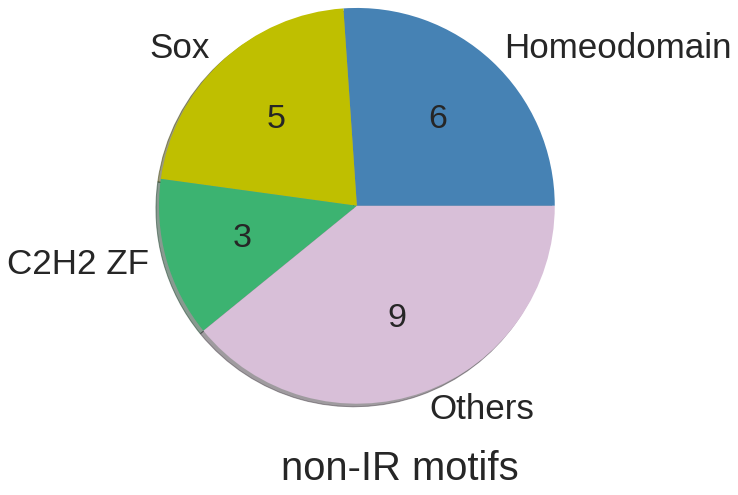

In [276]:
#res = df_neg['Family'].value_counts()[:4]
plt.figure(figsize=(7,7))
v = plt.pie(res.values(),explode=None,labels=res.keys(),shadow=True,labeldistance=1.09,radius=1.3,
            colors=['steelblue','y','mediumseagreen','thistle'],#'mediumseagreen','y'],
            autopct=lambda p: '{:.0f}'.format((p/100)*np.asarray(list(res.values())).sum()))
for txt in v[1]:
    txt.set_fontsize(35)
for txt in v[2]:
    txt.set_fontsize(34)
    
plt.text(-0.5,-1.8,'non-IR motifs',fontsize=40)
plt.savefig('IR_motif-fam-pie_neg.pdf',bbox_inches='tight')

## RNA Motif Families Enriched Analysis

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [156]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2022_08_15_8-00_pm_RNA/RBP_Information_all_motifs.txt',sep='\t')

In [157]:
df_annotate.head()

,RBP_ID,Family_ID,RSource_ID,Motif_ID,MSource_ID,DBID,RBP_Name,RBP_Species,RBP_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,RBPSource_Name,RBPSource_URL,RBPSource_Year,RBPSource_Month,RBPSource_Day
0,T00060_0.6,F09_0.6,TS19_0.6,.,.,ENSG00000160917,CPSF4,Homo_sapiens,N,"CCCH ZF,CCHC ZF",...,.,.,.,.,.,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T00506_0.6,F15_0.6,TS19_0.6,.,.,ENSG00000086589,RBM22,Homo_sapiens,N,"CCCH ZF,RRM",...,.,.,.,.,.,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T00507_0.6,F15_0.6,TS19_0.6,.,.,ENSG00000091009,RBM27,Homo_sapiens,N,"CCCH ZF,RRM",...,.,.,.,.,.,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T00508_0.6,F15_0.6,TS19_0.6,.,.,ENSG00000139746,RBM26,Homo_sapiens,N,"CCCH ZF,RRM",...,.,.,.,.,.,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T00509_0.6,F15_0.6,TS19_0.6,.,.,ENSG00000160201,U2AF1,Homo_sapiens,N,"CCCH ZF,RRM",...,.,.,.,.,.,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [158]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['RBP_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [159]:
tf_family_dict = {}
for TF in df_annotate['Motif_ID']:
    tf_family_dict[TF] = df_annotate[df_annotate['Motif_ID']==TF]['Family_Name'].iloc[0]

In [160]:
#df_pos = pd.read_csv('Basset_noEmbd/Motif_Analysis/tomtom_RNA_ed/tomtom.tsv',sep='\t')

df_pos = pd.read_csv('Basset_noEmbd/Motif_Analysis/tomtom_RNA_kullback/tomtom.tsv',sep='\t')

#df_pos = pd.read_csv('Basset_noEmbd/Motif_Analysis/tomtom_RNA_pearson/tomtom.tsv',sep='\t')

#df_pos = pd.read_csv('Basset_noEmbd/Motif_Analysis/tomtom_RNA_sandelin/tomtom.tsv',sep='\t')

df_pos['TF'] = df_pos['Target_ID'].apply(get_annotation, annotation_data = df_annotate, single_TF=False)

In [161]:
#df_neg = pd.read_csv('Basset_noEmbd/Motif_Analysis_Negative/tomtom_RNA_ed/tomtom.tsv',sep='\t')

df_neg = pd.read_csv('Basset_noEmbd/Motif_Analysis_Negative/tomtom_RNA_kullback/tomtom.tsv',sep='\t')

#df_neg = pd.read_csv('Basset_noEmbd/Motif_Analysis_Negative/tomtom_RNA_pearson/tomtom.tsv',sep='\t')

#df_neg = pd.read_csv('Basset_noEmbd/Motif_Analysis_Negative/tomtom_RNA_sandelin/tomtom.tsv',sep='\t')

df_neg['TF'] = df_neg['Target_ID'].apply(get_annotation, annotation_data = df_annotate,single_TF=False)

In [162]:
#df_pos = df_pos.loc[df_pos.groupby('Query_ID')['q-value'].idxmin()]
#df_neg = df_neg.loc[df_neg.groupby('Query_ID')['q-value'].idxmin()]

In [163]:
df_pos = df_pos[df_pos['q-value']<0.05]
df_neg = df_neg[df_neg['q-value']<0.05]

In [164]:
df_pos['Family'] = df_pos['Target_ID'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [165]:
df_neg['Family'] = df_neg['Target_ID'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [166]:
df_pos_res = df_pos['Family'].value_counts()/df_pos.shape[0]

In [167]:
df_neg_res = df_neg['Family'].value_counts()/df_neg.shape[0]

In [168]:
df_pos.sort_values('q-value').head(20)

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
10,filter199,M043_0.6,0.0,0.000012,0.001142,0.002261,7.0,GGGGAGAGGGGGG,GGGAAGG,-,"PCBP4,PCBP3,PCBP2",KH
9,filter130,M151_0.6,0.0,0.000053,0.005189,0.010324,7.0,GCGAGGCCGGGGG,GGGAGGG,+,"HNRNPH2,HNRNPH1,HNRNPF",RRM
6,filter67,M071_0.6,0.0,0.000072,0.007101,0.014055,8.0,GCCGACGCCGGCG,GACGACGG,+,SRSF7,"CCHC ZF,RRM"
7,filter105,M065_0.6,0.0,0.000107,0.010476,0.020599,7.0,GGGTGGAGGCGGG,GGAAGGA,+,SRSF9,RRM
1,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,"PCBP4,PCBP3,PCBP2",KH
5,filter45,M151_0.6,0.0,0.000125,0.012232,0.023949,7.0,CCCACACCCCCCC,CCCTCCC,-,"HNRNPH2,HNRNPH1,HNRNPF",RRM
8,filter125,M043_0.6,-1.0,0.000158,0.015515,0.030532,7.0,TCCTCCCCGGGCC,CCTTCCC,+,"PCBP4,PCBP3,PCBP2",KH
2,filter25,M053_0.6,-1.0,0.000617,0.060487,0.039477,7.0,TGAAGGAGGGGGG,GAAGGAA,+,RBM5,"RanBP ZF,RRM"
3,filter25,M074_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,TGAATGAG,+,TARDBP,RRM
4,filter25,M122_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,AGAGTATA,+,"MEX3C,MEX3D,MEX3B",KH


In [169]:
df_pos['TF'] = df_pos['TF'].apply(lambda x: x.split(','))
df_neg['TF'] = df_neg['TF'].apply(lambda x: x.split(','))

In [170]:
df_pos = df_pos.explode('TF')

In [171]:
df_neg = df_neg.explode('TF')

In [172]:
df_pos.shape

(23, 12)

In [173]:
df_neg.shape

(20, 12)

In [174]:
df_pos = df_pos.reset_index(drop=True)
df_neg = df_neg.reset_index(drop=True)

In [175]:
df_pos.to_csv('IR_RBP_TF_hits.txt', sep='\t')
df_neg.to_csv('nonIR_RBP_TF_hits.txt', sep='\t')

In [176]:
df_pos

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter9,M256_0.6,0.0,0.000250,0.024460,0.048664,6.0,CCCCTGAGCCGCC,GCACTG,-,ACO1,Unknown
1,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP4,KH
2,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP3,KH
3,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP2,KH
4,filter25,M053_0.6,-1.0,0.000617,0.060487,0.039477,7.0,TGAAGGAGGGGGG,GAAGGAA,+,RBM5,"RanBP ZF,RRM"
5,filter25,M074_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,TGAATGAG,+,TARDBP,RRM
6,filter25,M122_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,AGAGTATA,+,MEX3C,KH
7,filter25,M122_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,AGAGTATA,+,MEX3D,KH
8,filter25,M122_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,AGAGTATA,+,MEX3B,KH
9,filter45,M151_0.6,0.0,0.000125,0.012232,0.023949,7.0,CCCACACCCCCCC,CCCTCCC,-,HNRNPH2,RRM


In [177]:
df_neg

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter9,M256_0.6,0.0,0.000144,0.014106,0.028065,6.0,TCACTGATAATTA,GCACTG,-,ACO1,Unknown
1,filter19,M328_0.6,0.0,0.000021,0.002019,0.004038,13.0,ACCATTTTTTTTT,ATCCTTTTTTTTCG,+,ELAVL2,RRM
2,filter19,M328_0.6,0.0,0.000021,0.002019,0.004038,13.0,ACCATTTTTTTTT,ATCCTTTTTTTTCG,+,ELAVL3,RRM
3,filter67,M071_0.6,0.0,0.000121,0.011877,0.023508,8.0,GCCGACGTTATTA,GACGACGG,+,SRSF7,"CCHC ZF,RRM"
4,filter74,M231_0.6,-1.0,0.000172,0.016823,0.033470,7.0,TACAGGCTTTTTT,GCATGCT,-,EIF2S1,S1
5,filter109,M328_0.6,0.0,0.000200,0.019562,0.038629,13.0,GTCATTTTTTTTT,ATCCTTTTTTTTCG,+,ELAVL2,RRM
6,filter109,M328_0.6,0.0,0.000200,0.019562,0.038629,13.0,GTCATTTTTTTTT,ATCCTTTTTTTTCG,+,ELAVL3,RRM
7,filter110,M328_0.6,2.0,0.000076,0.007422,0.014842,12.0,CATTTATTTTTTT,ATCCTTTTTTTTCG,+,ELAVL2,RRM
8,filter110,M328_0.6,2.0,0.000076,0.007422,0.014842,12.0,CATTTATTTTTTT,ATCCTTTTTTTTCG,+,ELAVL3,RRM
9,filter178,M144_0.6,0.0,0.000359,0.035203,0.038277,7.0,CGTTTTCTTTTTT,GGTTTTC,-,PABPC1L,RRM


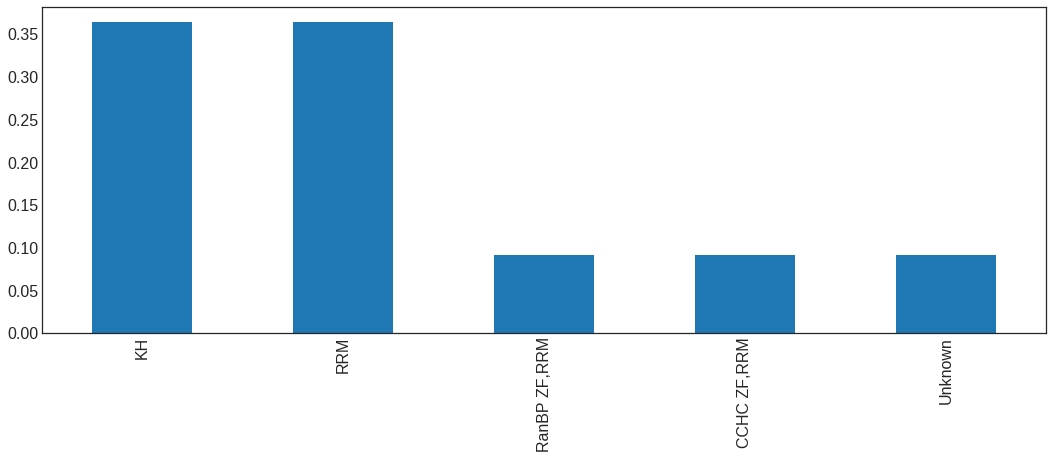

In [178]:
df_pos_res.plot(kind='bar',figsize=(18,6), fontsize=16)

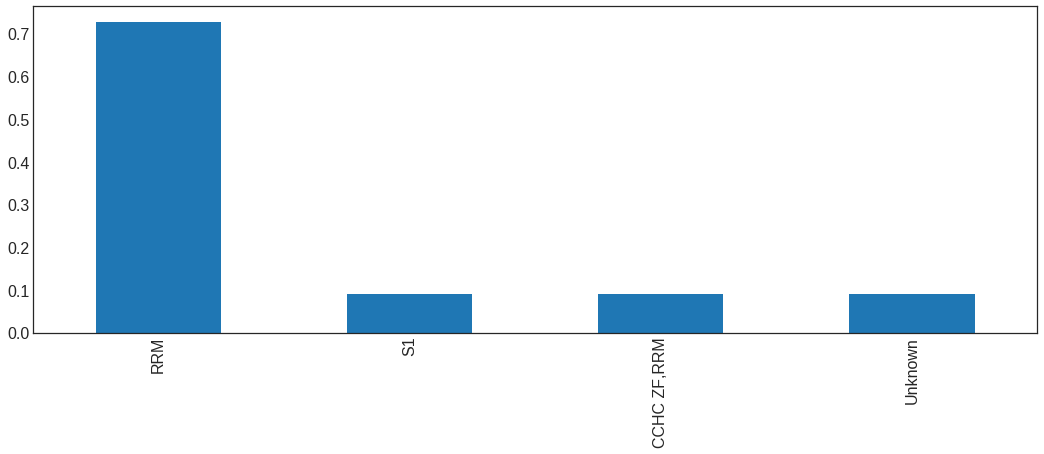

In [179]:
 df_neg_res.plot(kind='bar',figsize=(18,6), fontsize=16)

In [180]:
df_pos_res

KH              0.363636
RRM             0.363636
RanBP ZF,RRM    0.090909
CCHC ZF,RRM     0.090909
Unknown         0.090909
Name: Family, dtype: float64

In [181]:
df_neg_res

RRM            0.727273
S1             0.090909
CCHC ZF,RRM    0.090909
Unknown        0.090909
Name: Family, dtype: float64

In [182]:
df_pos.shape,df_neg.shape

((23, 12), (20, 12))

In [183]:
df_pos.head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter9,M256_0.6,0.0,0.000250,0.024460,0.048664,6.0,CCCCTGAGCCGCC,GCACTG,-,ACO1,Unknown
1,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP4,KH
2,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP3,KH
3,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP2,KH
4,filter25,M053_0.6,-1.0,0.000617,0.060487,0.039477,7.0,TGAAGGAGGGGGG,GAAGGAA,+,RBM5,"RanBP ZF,RRM"


In [184]:
pos_size = len(set(df_pos['Target_ID']))
neg_size = len(set(df_neg['Target_ID']))
inters_size = len(set.intersection(set(df_pos['Target_ID']),set(df_neg['Target_ID'])))

In [185]:
pos_size,neg_size,inters_size

(8, 8, 2)

##### Venn diagrams

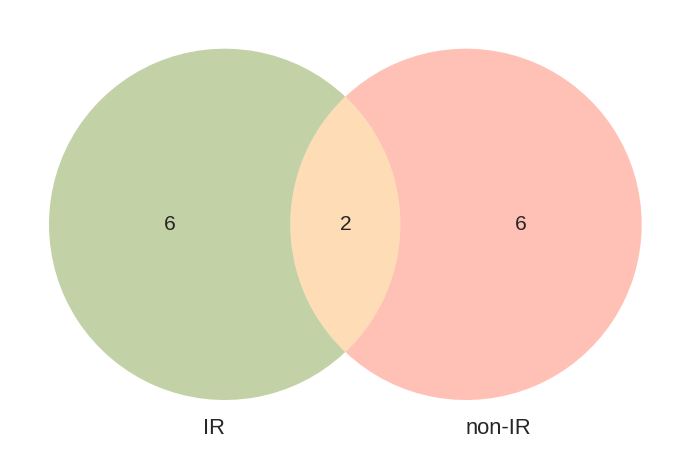

In [186]:
plt.figure(figsize=(14,8))
v = venn2(subsets=((pos_size),(neg_size),inters_size), set_labels=('IR','non-IR'),set_colors=('olivedrab','tomato'))
v.get_label_by_id('100').set_text(pos_size-inters_size)
v.get_label_by_id('010').set_text(neg_size-inters_size)

for text in v.set_labels:
    text.set_fontsize(22)

for text in v.subset_labels:
    text.set_fontsize(21)

#plt.text(-0.5,0.54,"IR vs. non-IR TF motif overlap",fontsize=25)
#plt.savefig('IR_motif-overlap_venn.pdf',bbox_inches='tight')

In [187]:
df_pos.shape

(23, 12)

In [188]:
df_pos = df_pos.drop_duplicates(subset='Target_ID',keep='first')

In [189]:
df_pos.shape

(8, 12)

In [204]:
df_pos[['TF','Family']]

,TF,Family
0,ACO1,Unknown
1,PCBP4,KH
4,RBM5,"RanBP ZF,RRM"
5,TARDBP,RRM
6,MEX3C,KH
9,HNRNPH2,RRM
12,SRSF7,"CCHC ZF,RRM"
13,SRSF9,RRM


In [205]:
df_pos['Family'].value_counts(normalize=True)

RRM             0.375
KH              0.250
RanBP ZF,RRM    0.125
CCHC ZF,RRM     0.125
Unknown         0.125
Name: Family, dtype: float64

In [190]:
df_pos

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter9,M256_0.6,0.0,0.000250,0.024460,0.048664,6.0,CCCCTGAGCCGCC,GCACTG,-,ACO1,Unknown
1,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP4,KH
4,filter25,M053_0.6,-1.0,0.000617,0.060487,0.039477,7.0,TGAAGGAGGGGGG,GAAGGAA,+,RBM5,"RanBP ZF,RRM"
5,filter25,M074_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,TGAATGAG,+,TARDBP,RRM
6,filter25,M122_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,AGAGTATA,+,MEX3C,KH
9,filter45,M151_0.6,0.0,0.000125,0.012232,0.023949,7.0,CCCACACCCCCCC,CCCTCCC,-,HNRNPH2,RRM
12,filter67,M071_0.6,0.0,0.000072,0.007101,0.014055,8.0,GCCGACGCCGGCG,GACGACGG,+,SRSF7,"CCHC ZF,RRM"
13,filter105,M065_0.6,0.0,0.000107,0.010476,0.020599,7.0,GGGTGGAGGCGGG,GGAAGGA,+,SRSF9,RRM


In [191]:
temp_res = df_pos['Family'].value_counts()
res = {}
res[temp_res.keys()[0]] = temp_res.values[0]
res[temp_res.keys()[1]] = temp_res.values[1]
res['Others'] = temp_res[2:].sum()
res.values()

dict_values([3, 2, 3])

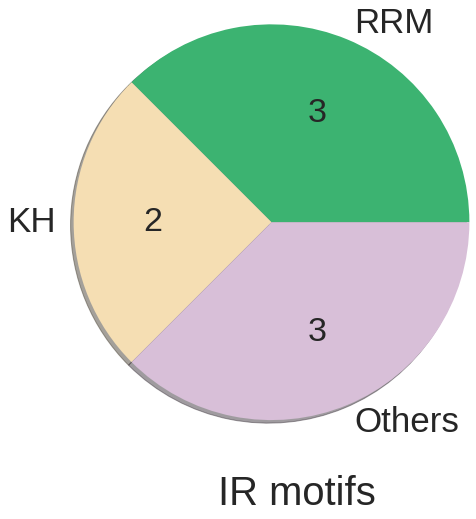

In [192]:
#res = df_pos['Family'].value_counts()[:4]
plt.figure(figsize=(7,7))
v = plt.pie(res.values(),explode=None,labels=res.keys(),shadow=True,labeldistance=1.09,radius=1.3,
            colors=['mediumseagreen','wheat','thistle','darksalmon'],
            autopct=lambda p: '{:.0f}'.format((p/100)*np.asarray(list(res.values())).sum())) #lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*res.sum())
for txt in v[1]:
    txt.set_fontsize(35)
for txt in v[2]:
    txt.set_fontsize(34)
plt.text(-0.35,-1.85,'IR motifs',fontsize=40)
plt.savefig('IR_RNA_motif-fam-pie_pos.pdf',bbox_inches='tight')

In [193]:
df_neg = df_neg.drop_duplicates(subset='Target_ID',keep='first')

In [194]:
df_neg

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter9,M256_0.6,0.0,0.000144,0.014106,0.028065,6.0,TCACTGATAATTA,GCACTG,-,ACO1,Unknown
1,filter19,M328_0.6,0.0,0.000021,0.002019,0.004038,13.0,ACCATTTTTTTTT,ATCCTTTTTTTTCG,+,ELAVL2,RRM
3,filter67,M071_0.6,0.0,0.000121,0.011877,0.023508,8.0,GCCGACGTTATTA,GACGACGG,+,SRSF7,"CCHC ZF,RRM"
4,filter74,M231_0.6,-1.0,0.000172,0.016823,0.033470,7.0,TACAGGCTTTTTT,GCATGCT,-,EIF2S1,S1
9,filter178,M144_0.6,0.0,0.000359,0.035203,0.038277,7.0,CGTTTTCTTTTTT,GGTTTTC,-,PABPC1L,RRM
13,filter178,M062_0.6,-1.0,0.001001,0.098100,0.045435,7.0,CGTTTTCTTTTTT,TTTTTCT,-,SART3,RRM
14,filter178,M146_0.6,-1.0,0.001001,0.098100,0.045435,7.0,CGTTTTCTTTTTT,TTTTTCT,-,PABPC1,RRM
17,filter178,M227_0.6,0.0,0.001250,0.122509,0.045435,7.0,CGTTTTCTTTTTT,CTTTTCT,+,PTBP1,RRM


In [202]:
df_neg[['TF','Family']]

,TF,Family
0,ACO1,Unknown
1,ELAVL2,RRM
3,SRSF7,"CCHC ZF,RRM"
4,EIF2S1,S1
9,PABPC1L,RRM
13,SART3,RRM
14,PABPC1,RRM
17,PTBP1,RRM


In [203]:
df_neg['Family'].value_counts(normalize=True)

RRM            0.625
S1             0.125
CCHC ZF,RRM    0.125
Unknown        0.125
Name: Family, dtype: float64

In [195]:
temp_res = df_neg['Family'].value_counts()
res = {}
res[temp_res.keys()[0]] = temp_res.values[0]
res[temp_res.keys()[1]] = temp_res.values[1]
res[temp_res.keys()[2]] = temp_res.values[2]
res['Others'] = temp_res[3:].sum()
res.values()

dict_values([5, 1, 1, 1])

In [196]:
res

{'RRM': 5, 'S1': 1, 'CCHC ZF,RRM': 1, 'Others': 1}

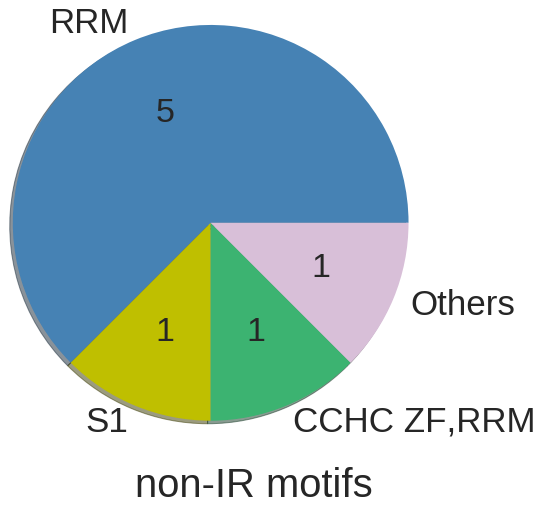

In [197]:
#res = df_neg['Family'].value_counts()[:4]
plt.figure(figsize=(7,7))
v = plt.pie(res.values(),explode=None,labels=res.keys(),shadow=True,labeldistance=1.09,radius=1.3,
            colors=['steelblue','y','mediumseagreen','thistle'],#'mediumseagreen','y'],
            autopct=lambda p: '{:.0f}'.format((p/100)*np.asarray(list(res.values())).sum()))
for txt in v[1]:
    txt.set_fontsize(35)
for txt in v[2]:
    txt.set_fontsize(34)
    
plt.text(-0.5,-1.8,'non-IR motifs',fontsize=40)
plt.savefig('IR_RNA_motif-fam-pie_neg.pdf',bbox_inches='tight')

In [198]:
df_pos

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter9,M256_0.6,0.0,0.000250,0.024460,0.048664,6.0,CCCCTGAGCCGCC,GCACTG,-,ACO1,Unknown
1,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP4,KH
4,filter25,M053_0.6,-1.0,0.000617,0.060487,0.039477,7.0,TGAAGGAGGGGGG,GAAGGAA,+,RBM5,"RanBP ZF,RRM"
5,filter25,M074_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,TGAATGAG,+,TARDBP,RRM
6,filter25,M122_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,AGAGTATA,+,MEX3C,KH
9,filter45,M151_0.6,0.0,0.000125,0.012232,0.023949,7.0,CCCACACCCCCCC,CCCTCCC,-,HNRNPH2,RRM
12,filter67,M071_0.6,0.0,0.000072,0.007101,0.014055,8.0,GCCGACGCCGGCG,GACGACGG,+,SRSF7,"CCHC ZF,RRM"
13,filter105,M065_0.6,0.0,0.000107,0.010476,0.020599,7.0,GGGTGGAGGCGGG,GGAAGGA,+,SRSF9,RRM


In [199]:
df_pos_RBPs = (df_pos.set_index('Query_ID')['TF']
         .str.split(',', expand=True)
         .stack()
         .reset_index(level=1, drop=True)
         .reset_index(name='TF'))

In [200]:
df_pos_RBPs

,Query_ID,TF
0,filter9,ACO1
1,filter25,PCBP4
2,filter25,RBM5
3,filter25,TARDBP
4,filter25,MEX3C
5,filter45,HNRNPH2
6,filter67,SRSF7
7,filter105,SRSF9


In [387]:
df_pos.TF = df_pos.TF.str.split(',')                                                             
df_pos.explode('TF')

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter9,M256_0.6,0.0,0.000250,0.024460,0.048664,6.0,CCCCTGAGCCGCC,GCACTG,-,ACO1,Unknown
1,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP4,KH
1,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP3,KH
1,filter25,M043_0.6,0.0,0.000110,0.010732,0.020785,7.0,TGAAGGAGGGGGG,GGGAAGG,-,PCBP2,KH
2,filter25,M053_0.6,-1.0,0.000617,0.060487,0.039477,7.0,TGAAGGAGGGGGG,GAAGGAA,+,RBM5,"RanBP ZF,RRM"
3,filter25,M074_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,TGAATGAG,+,TARDBP,RRM
4,filter25,M122_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,AGAGTATA,+,MEX3C,KH
4,filter25,M122_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,AGAGTATA,+,MEX3D,KH
4,filter25,M122_0.6,0.0,0.000832,0.081535,0.039477,8.0,TGAAGGAGGGGGG,AGAGTATA,+,MEX3B,KH
5,filter45,M151_0.6,0.0,0.000125,0.012232,0.023949,7.0,CCCACACCCCCCC,CCCTCCC,-,HNRNPH2,RRM


In [378]:
df_neg_RBPs = (df_neg.set_index('Query_ID')['TF']
         .str.split(',', expand=True)
         .stack()
         .reset_index(level=1, drop=True)
         .reset_index(name='TF'))

In [379]:
df_neg_RBPs

,Query_ID,TF
0,filter9,ACO1
1,filter19,ELAVL2
2,filter19,ELAVL3
3,filter67,SRSF7
4,filter74,EIF2S1
5,filter178,PABPC1L
6,filter178,PABPC3
7,filter178,SART3
8,filter178,PABPC1
9,filter178,PABPC1L


In [388]:
df_neg.TF = df_neg.TF.str.split(',')                                                             
df_neg.explode('TF')

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
0,filter9,M256_0.6,0.0,0.000144,0.014106,0.028065,6.0,TCACTGATAATTA,GCACTG,-,ACO1,Unknown
1,filter19,M328_0.6,0.0,0.000021,0.002019,0.004038,13.0,ACCATTTTTTTTT,ATCCTTTTTTTTCG,+,ELAVL2,RRM
1,filter19,M328_0.6,0.0,0.000021,0.002019,0.004038,13.0,ACCATTTTTTTTT,ATCCTTTTTTTTCG,+,ELAVL3,RRM
2,filter67,M071_0.6,0.0,0.000121,0.011877,0.023508,8.0,GCCGACGTTATTA,GACGACGG,+,SRSF7,"CCHC ZF,RRM"
3,filter74,M231_0.6,-1.0,0.000172,0.016823,0.033470,7.0,TACAGGCTTTTTT,GCATGCT,-,EIF2S1,S1
6,filter178,M144_0.6,0.0,0.000359,0.035203,0.038277,7.0,CGTTTTCTTTTTT,GGTTTTC,-,PABPC1L,RRM
6,filter178,M144_0.6,0.0,0.000359,0.035203,0.038277,7.0,CGTTTTCTTTTTT,GGTTTTC,-,PABPC3,RRM
8,filter178,M062_0.6,-1.0,0.001001,0.098100,0.045435,7.0,CGTTTTCTTTTTT,TTTTTCT,-,SART3,RRM
9,filter178,M146_0.6,-1.0,0.001001,0.098100,0.045435,7.0,CGTTTTCTTTTTT,TTTTTCT,-,PABPC1,RRM
9,filter178,M146_0.6,-1.0,0.001001,0.098100,0.045435,7.0,CGTTTTCTTTTTT,TTTTTCT,-,PABPC1L,RRM


### Some relevant literature

https://en.wikipedia.org/wiki/RNA-binding_protein#RNA-recognition_motif_(RRM)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3798263/

### Leave one chrom out AUC plots